# Intro to Gradient Descent

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [50]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=50,random_state=2)

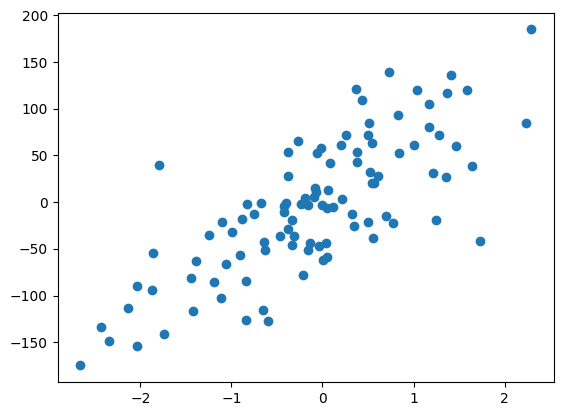

In [51]:
plt.scatter(x,y)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [53]:
lr=LinearRegression()

lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr.coef_,lr.intercept_,y_pred

(array([51.88201981]),
 np.float64(-0.5023661899901288),
 array([ 26.69919158, -10.33241434,  31.21522825,  28.87714748,
         21.988299  , -44.17391969,  84.59819639,  27.46506828,
         25.53499936, -20.29621186,  -8.46600697,  72.47987609,
        -34.39430953,  43.2059673 , -46.0603773 , -17.91798452,
         27.6359807 , -75.18337029, -74.23798654,  10.09235622]))

In [54]:
r2_score(y_pred,y_test)

0.08916688079116342

In [62]:
class GD:
    def __init__(self,learning_rate,epcohs):
        self.m=100
        self.b=120
        self.n=learning_rate
        self.epochs=epcohs
    def fit(self,x,y):
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y-self.m*x.ravel()-self.b)
            self.b=self.b-(self.n*loss_slope_b)


            loss_slope_m=-2*np.sum((y-self.m*x.ravel()-self.b)*x.ravel())
            self.m=self.m-(self.n*loss_slope_m)
        print(self.m,self.b)
    def predict(self,x):
        return self.m*x+self.b

In [82]:
gd=GD(0.001,75)

In [83]:
gd.fit(x_train,y_train)

51.88235153173731 -0.501686884822522


In [65]:
y_pred=gd.predict(x_test)

In [66]:
r2_score(y_pred,y_test)

0.08916726909673134